---
# <center> *Machine Learning*
## <center> Regression
---

In this notebook, we’ll explore **regression** step by step — starting from basic concepts and gradually building toward real-world complexity and the role of **dimensionality reduction** using **PCA**.

---


## 1️⃣ What Is Regression?

**Regression** is a method used to model the relationship between one or more input variables (features) and an output variable (target).

We try to **fit a function** to the data that can predict the target variable for new inputs.

---

### Simple Linear Regression

We start with the simplest case: one input variable $x$ and one output $y$.

$$
y = \beta_0 + \beta_1 x + \varepsilon
$$

Where:
- $y$ is the predicted value
- $x$ is the input
- $\beta_0$ is the intercept (bias)
- $\beta_1$ is the slope (weight)
- $\varepsilon$ is the error (what our model can’t explain)

---

### Goal

We want to **find the values of $\beta_0$ and $\beta_1$** that give the best predictions on the training data.


## 2️⃣ Least Squares Minimization

To find the "best" regression line, we use the **least squares method**.

The idea:
- Predict values $\hat{y}_i$ for each training point
- Compute the squared error: $(y_i - \hat{y}_i)^2$
- Add them all up: the **cost function**

---

### Cost Function

$$
J(\beta_0, \beta_1) = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2
$$

We minimize $J$ to find the best-fitting line.

This is a convex optimization problem: it has a closed-form solution in simple cases.


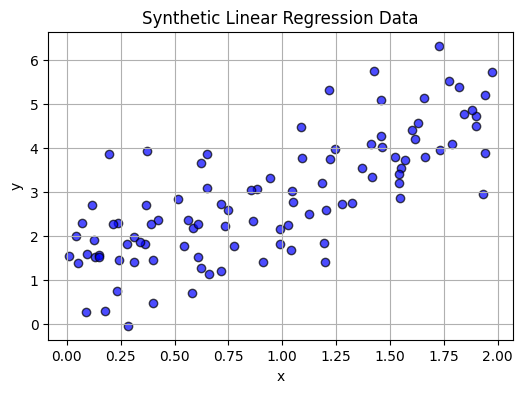

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate synthetic data: y = 2x + 1 + noise
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)

# Plot the data
plt.figure(figsize=(6, 4))
plt.scatter(X, y, c='blue', edgecolor='k', alpha=0.7)
plt.title("Synthetic Linear Regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Example: Simple Linear Regression from Synthetic Data

We’ve generated 100 data points based on the equation:

$$
y = 1 + 2x + \text{noise}
$$

Next: we will fit a linear model to this data and compare the predicted line to the original noisy data.


## Solving Linear Regression Analytically

We used the **normal equation** to find the best-fit line:

$$
\hat{\theta} = (X^T X)^{-1} X^T y
$$

Where:
- $X$ is the matrix of features (with a column of 1s for the bias term)
- $y$ is the target vector
- $\hat{\theta}$ contains the intercept and slope

In our case:

$$
\hat{\theta} \approx
\begin{bmatrix}
1.22 \\
1.77
\end{bmatrix}
$$

This matches the original function $y = 1 + 2x + \text{noise}$ fairly closely.


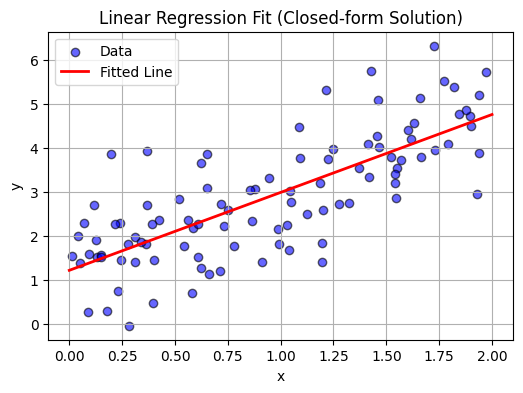

array([1.21509616, 1.77011339])

In [2]:
# Step 2: Solve linear regression using closed-form least squares solution

# Add bias term (column of 1s) to X
X_b = np.c_[np.ones((100, 1)), X]  # shape: (100, 2)

# Closed-form solution: theta = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predict y values using the learned parameters
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b @ theta_best

# Plot original data and fitted line
plt.figure(figsize=(6, 4))
plt.scatter(X, y, c='blue', edgecolor='k', alpha=0.6, label="Data")
plt.plot(X_new, y_predict, 'r-', linewidth=2, label="Fitted Line")
plt.title("Linear Regression Fit (Closed-form Solution)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

theta_best.squeeze()  # Show learned parameters [intercept, slope]


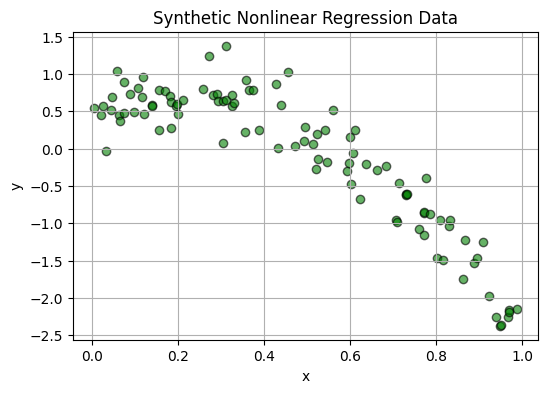

In [12]:
# Step 3: Create a synthetic nonlinear regression example
np.random.seed(42)

# x values between 0 and 1
X_nl = np.sort(np.random.rand(100, 1), axis=0)
# y = 0.5 + 2x - 5x^2 + noise
y_nl = 0.5 + 2 * X_nl - 5 * X_nl**2 + 0.3 * np.random.randn(100, 1)

# Plot the nonlinear data
plt.figure(figsize=(6, 4))
plt.scatter(X_nl, y_nl, c='green', edgecolor='k', alpha=0.6)
plt.title("Synthetic Nonlinear Regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Nonlinear Regression

Sometimes, the relationship between inputs and output is **not linear**.  
In that case, we need to use models that can fit **curved patterns**.

For example, the function:

$$
y = 0.5 + 2x - 5x^2 + \varepsilon
$$

is quadratic, we need to include $x^2$ as a feature.

---

Let’s now try fitting a **polynomial regression** model by adding $x^2$ as a new feature manually.


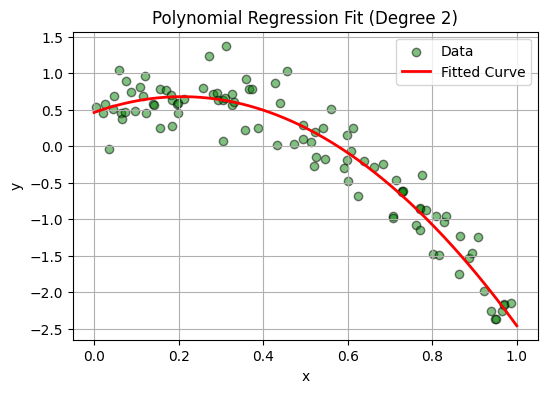

array([ 0.46178844,  2.08424283, -5.00557819])

In [4]:
# Step 4: Add nonlinear feature (x^2) and fit polynomial regression manually

# Add a column of ones (bias), x, and x^2
X_poly = np.c_[np.ones((100, 1)), X_nl, X_nl**2]

# Fit using normal equation
theta_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_nl

# Predict on smooth curve for plotting
X_plot = np.linspace(0, 1, 300).reshape(-1, 1)
X_plot_poly = np.c_[np.ones((300, 1)), X_plot, X_plot**2]
y_plot = X_plot_poly @ theta_poly

# Plot original data and fitted curve
plt.figure(figsize=(6, 4))
plt.scatter(X_nl, y_nl, c='green', alpha=0.5, edgecolor='k', label='Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Fitted Curve')
plt.title("Polynomial Regression Fit (Degree 2)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

theta_poly.squeeze()  # Display learned parameters [bias, coef_x, coef_x^2]


## Polynomial Regression via Feature Engineering

When the relationship between $x$ and $y$ is nonlinear, we can still use **linear regression** by adding nonlinear **features** like $x^2$, $x^3$, etc.

We fitted this model:

$$
y = \theta_0 + \theta_1 x + \theta_2 x^2
$$

The learned parameters were approximately:

$$
\theta = [0.46, 2.08, -5.01]
$$

This closely matches the function we used to generate the data:

$$
y = 0.5 + 2x - 5x^2 + \varepsilon
$$

✅ Even though the relationship is nonlinear in $x$, it’s **linear in parameters**, so we can still use the normal equation.

---

Next: We’ll explore what happens when we add too many features or irrelevant ones — and why **dimensionality reduction** helps with that.


In [5]:
# Step 5: Add a redundant feature and observe instability in the regression coefficients

# Create a new feature that's highly correlated with the original x
x1 = X_nl
x2 = x1 + 0.01 * np.random.randn(100, 1)  # highly correlated with x1
X_redundant = np.c_[np.ones((100, 1)), x1, x2]

# Fit regression using the normal equation
theta_redundant = np.linalg.inv(X_redundant.T @ X_redundant) @ X_redundant.T @ y_nl

# Show the learned parameters
theta_redundant.squeeze()

array([ 1.20696647, -3.07066067,  0.28352389])

## Regression Sensitivity: Redundant Features

What happens when we add **two input features that are highly correlated**?

For example, suppose:
- $x_1$ is our original input
- $x_2$ is just a slightly noisy copy of $x_1$

Even though $x_2$ adds no new information, the regression model assigns **unreliable coefficients**.

---

### Why?

When features are highly correlated, the matrix $X^T X$ becomes **ill-conditioned** (nearly singular), and its inverse becomes unstable.

This is called **multicollinearity**, and it leads to:
- Large or inconsistent coefficients
- Sensitivity to small data changes
- Poor generalization

---

This is one reason why we often want to **reduce the dimensionality of our features** — especially when we have many inputs or redundancy.


In [6]:
# Step 6: Demonstration — slight change in redundant feature affects coefficients significantly

# Make another noisy copy of x1 with slightly different noise
x2_alt = x1 + 0.02 * np.random.randn(100, 1)  # just slightly different noise than before
X_alt = np.c_[np.ones((100, 1)), x1, x2_alt]

# Fit regression again
theta_alt = np.linalg.inv(X_alt.T @ X_alt) @ X_alt.T @ y_nl

# Compare the original and alternate weights
print("First set of coefficients with redundant feature (x2):")
print(theta_redundant.squeeze())

print("\nSecond set of coefficients with slightly different redundant feature (x2_alt):")
print(theta_alt.squeeze())


First set of coefficients with redundant feature (x2):
[ 1.20696647 -3.07066067  0.28352389]

Second set of coefficients with slightly different redundant feature (x2_alt):
[ 1.20939381 -2.00028648 -0.78799302]


## Demonstration: Small Changes → Big Effects

We kept the original input $x_1$ the same.

Then we added two slightly different versions of a second feature:
- $x_2 = x_1 + \text{small noise}$
- $x_{2alt} = x_1 + \text{slightly different noise}$

We ran the regression twice.

---

### Result:

The coefficients **changed a lot**, even though the data barely changed.

This shows that **redundancy between features makes the model unstable**.  
It becomes unclear which feature to trust, and the model reacts in unpredictable ways.

---

This problem becomes worse with:
- Many input features
- Small training sets
- Highly correlated or noisy data

✅ The solution? Use **dimensionality reduction techniques** like **PCA** to remove redundant or uninformative directions.


# Dimensionality Reduction

## Why Dimensionality Reduction?

When we have many input variables (features), several problems can occur:

- **Redundancy**: Some features may carry overlapping information (like $x$ and a noisy copy of $x$).
- **Noise**: Uninformative or irrelevant features introduce noise.
- **Overfitting**: More features increase the risk of fitting to noise rather than signal.
- **Computational cost**: More dimensions mean more processing time and memory.

These issues are especially common in real-world datasets, where:
- Features may be highly correlated.
- Some features contribute little to predicting the output.
- Models become unstable and sensitive to small changes in the data.